<a href="https://colab.research.google.com/github/rok0306/Python/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EC%A4%80%EB%B9%84_%3D%3E_%EB%AA%A8%EB%8D%B8%EC%83%9D%EC%84%B1_%3D%3E_%ED%95%99%EC%8A%B5_%3D%3E_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텐서플로우를 이용한 딥러닝

In [2]:
(a1,a2),(b1,b2)=[([3,4],[30,40]),([6,7],[60,70])]
print(a1,a2,b1,b2)
type(a1)

[3, 4] [30, 40] [6, 7] [60, 70]


list

데이터셋 준비 => 모델생성 => 학습 => 예측

In [3]:
#tensorflow 와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#패션MNIST 데이터는 keras의 데이터셋에 있는 이를 읽어와서 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
print(dir(fashion_mnist))
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'load_data']
4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape #28*28픽셀크기의 60000 이미지 데이터

(60000, 28, 28)

In [6]:
train_labels.shape #60000개의 라벨

(60000,)

In [7]:
train_images[0].shape #이미지 1개의 크기는 28*28픽셀

(28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
train_labels[:5] #훈련용 데이터의 5개의 레이블 확인 (0~9까지 10까지 종류)

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
np.set_printoptions(linewidth=150)
train_images[0] #이미지는 넘파이 배열에 저장되어있음, 한 픽셀은 0~255값

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [11]:
class_names=['T-shirts/top','Trowser','Pullover','Dress','Coat','Sandal','Shirt','Sweater','Bag','Ankle boot']
print(train_labels[0])
class_names[train_labels[0]] # 라벨에 대응하는 품목이름 출력

9


'Ankle boot'

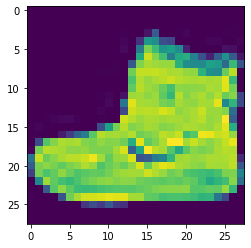

In [12]:
plt.imshow(train_images[0])
plt.show()

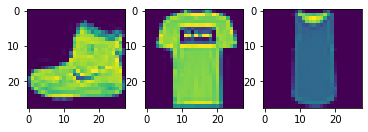

In [13]:
fig=plt.figure()
ax1=fig.add_subplot(1,3,1) # 1행3열의 1번쨰위치에 배치
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.imshow(train_images[0]) # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1]) # 두 번째 훈련용 데이터
ax3.imshow(train_images[2]) # 세 번째 훈련용 데이터
plt.show()

딥러닝 인공 신경망을 구축해보자

In [15]:
# keras에 있는 Sequetial 모델을 만들어서 Flatten 한줄로 늘어놓고 DEnse층에 넣고 relu라는 비선형함수를 통과해서 나옴
# 입력레이어, 히든 레이어, 출력 레이어로 구성
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # Flatten 계층, 784(28*28)인 1차원 배열로 바꿔줌, 외부임력을 신경망으로 가져오는 역할
                          keras.layers.Dense(128,activation='relu'), # 히든레이어, 노드개수가 128개인 Dense 계층 활성화 relu 활성화 함수 사용 계층을 더 추가해 보자
                          keras.layers.Dense(10,activation='softmax') # 출력레이어, 신경망의 출력을 외부로 전달, Dense 계층 활성화 sdftmax 활성화 함수 사용
]) # 노드개수 10개의 노드 출력값의 합이 1이 되도록 조정 됨.

인공 신경망을 학습시켜보자 : 최적화와 에폭

In [16]:
model.compile(optimizer='adam', # adam(adaptive moment estimation)최적화 기법 사용
              loss='sparse_categorical_crossentropy', # 손실함수
              metrics=['accuracy'])

In [17]:
# 훈련 데이터 모음을 가지고 한 번 훈련을 실시하는 것을 에폭(epoch)이라고 부름, 훈련을 5차례 실시
# 에폭 단계마다 손실값과 정확히 출력됨, 훈련이 진행될수록 손실값은 줄어들고 예측의 정확도는 증가함
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1700 - accuracy: 0.7187
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6285 - accuracy: 0.7850
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5422 - accuracy: 0.8118
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5121 - accuracy: 0.8257
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4950 - accuracy: 0.8327


In [19]:
# 평가 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Wn 테스트 :", test_acc)

313/313 - 0s - loss: 0.5504 - accuracy: 0.8239
Wn 테스트 : 0.8238999843597412


학습된 신경망을 새 이미지에 적용해 보자

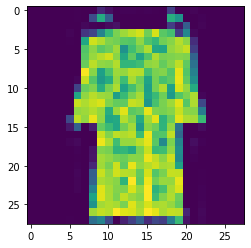

In [20]:
img=test_images[33]
label=test_labels[33]
img.shape # 테스트 이미지가 2차원 배열임을 확인합
plt.imshow(test_images[33])

In [27]:
img1=np.around(test_images[33]/255,1)
img1

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.6, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.1, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.4, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8, 0.9, 0.7, 0.7, 0.2, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.9, 0.9, 0.8, 0.8, 0.7, 0.7, 0.8, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.8, 0.7, 0.8, 0.9, 0.5, 0.7, 0.8, 0.9, 0.6, 0.6, 0.8, 0.9, 0.9, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.8, 0.9, 0.9, 0.8, 0.6, 0.8, 0.6, 0.7, 0.9, 0.8, 0.8, 0.8

In [23]:
img=np.expand_dims(img,axis=0)# 0번째 차원 추가
img.shape

(1, 28, 28)

In [28]:
img

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.,

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
predic=model.predict(img)
print(predic)
print(np.argmax(predic))
print(class_names[np.argmax(predic)])

[[0.09160748 0.04161294 0.16707279 0.15852578 0.11576917 0.08749733 0.12133732 0.07267091 0.1214079  0.02249842]]
2
Pullover


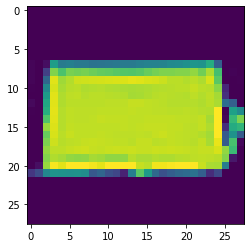

In [31]:
import numpy as np
randldx=np.random.randint(0,1000) #0에서 1000사이의 임의 수 발생시켜 테스트 이미지 선택
plt.imshow(test_images[randldx])

In [32]:
yhat = model.predict(test_images[randldx][np.newaxis,:,:])
print(yhat)
yhat=np.argmax(yhat) # 10개의 출력 값 중 가장 큰 값을 출력
print(yhat)

[[1.19574295e-04 3.40834981e-06 2.63698079e-04 2.51089538e-10 5.92273391e-05 1.60632972e-02 1.08988285e-01 1.43771866e-08 8.74502361e-01
  1.06324940e-07]]
8
